# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Outcome
- **lignes et colonnes** : 768 lignes pour 9 colonnes
- **types de variables** : 7 int et 2 float
- **Analyse des valeurs manquantes** : aucune valeur manquante


#### Analyse de Fond :
- **Visualisation de la target** : 35 % diabète (1), 65% pas diabète (0)
    
    
    
    
- **Signification des variables** : pregnancies --> nombre de grossesses, les autres sont des taux.
    



- **Relation Variables / Target** : glucose, BMI et age semblent être liés aux fait d'être diabétique
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** : Détection de potentiels outliers lorsque glucose = 0 et/ou BloodPressure = 0 et/ou SkinThickness et/ou Insulin et/ou BMI. Corrélation de 0.4 entre BMI/SkinThickness et Insulin/SkinThickness, et de 0.5 entre pregnancies et age.
    

- **NaN analyse** : Nothing

### hypotheses nulle (H0): 

Test de student pour savoir si glucose age et BMI sont bien significativement différent si la personne est diabétique.

H0 : la variable V en question n'a aucun impact sur le fait d'être diabétique.

BloodPressure et SkinThickness n'impactent pas le fait d'être diabétique d'après le test de student



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projets Data persos/DiabetesPrediction/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.loc[:,'Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
df.isna().value_counts(normalize=True)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      1.0
dtype: float64

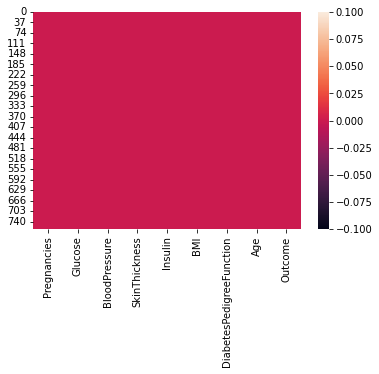

In [ ]:
sns.heatmap(df.isna())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


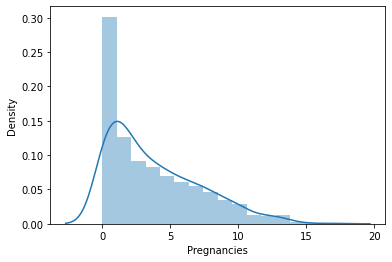

In [ ]:
sns.distplot(df['Pregnancies'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

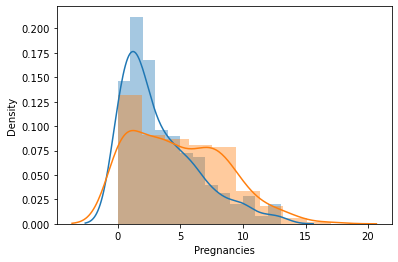

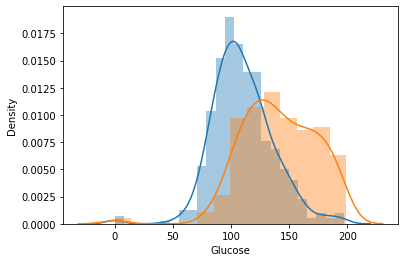

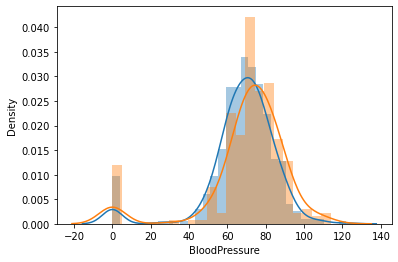

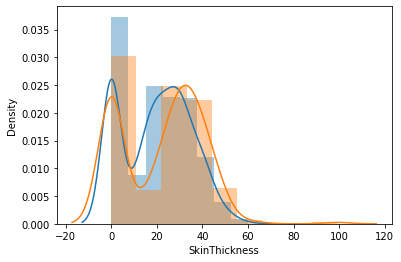

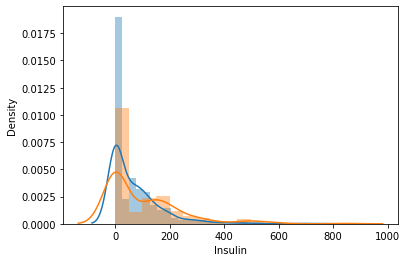

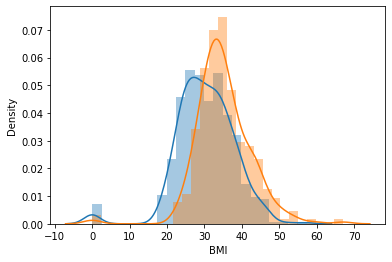

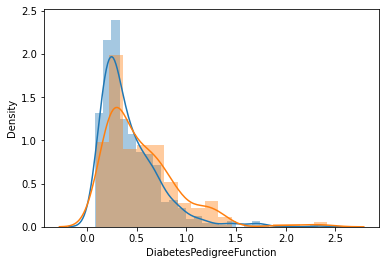

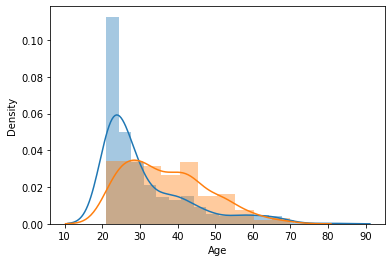

In [ ]:
i = 0
for var in list(df.columns)[:-1]:
  plt.figure(i)
  sns.distplot(df.loc[df['Outcome']==0, var])
  sns.distplot(df.loc[df['Outcome']==1, var])
  i += 1


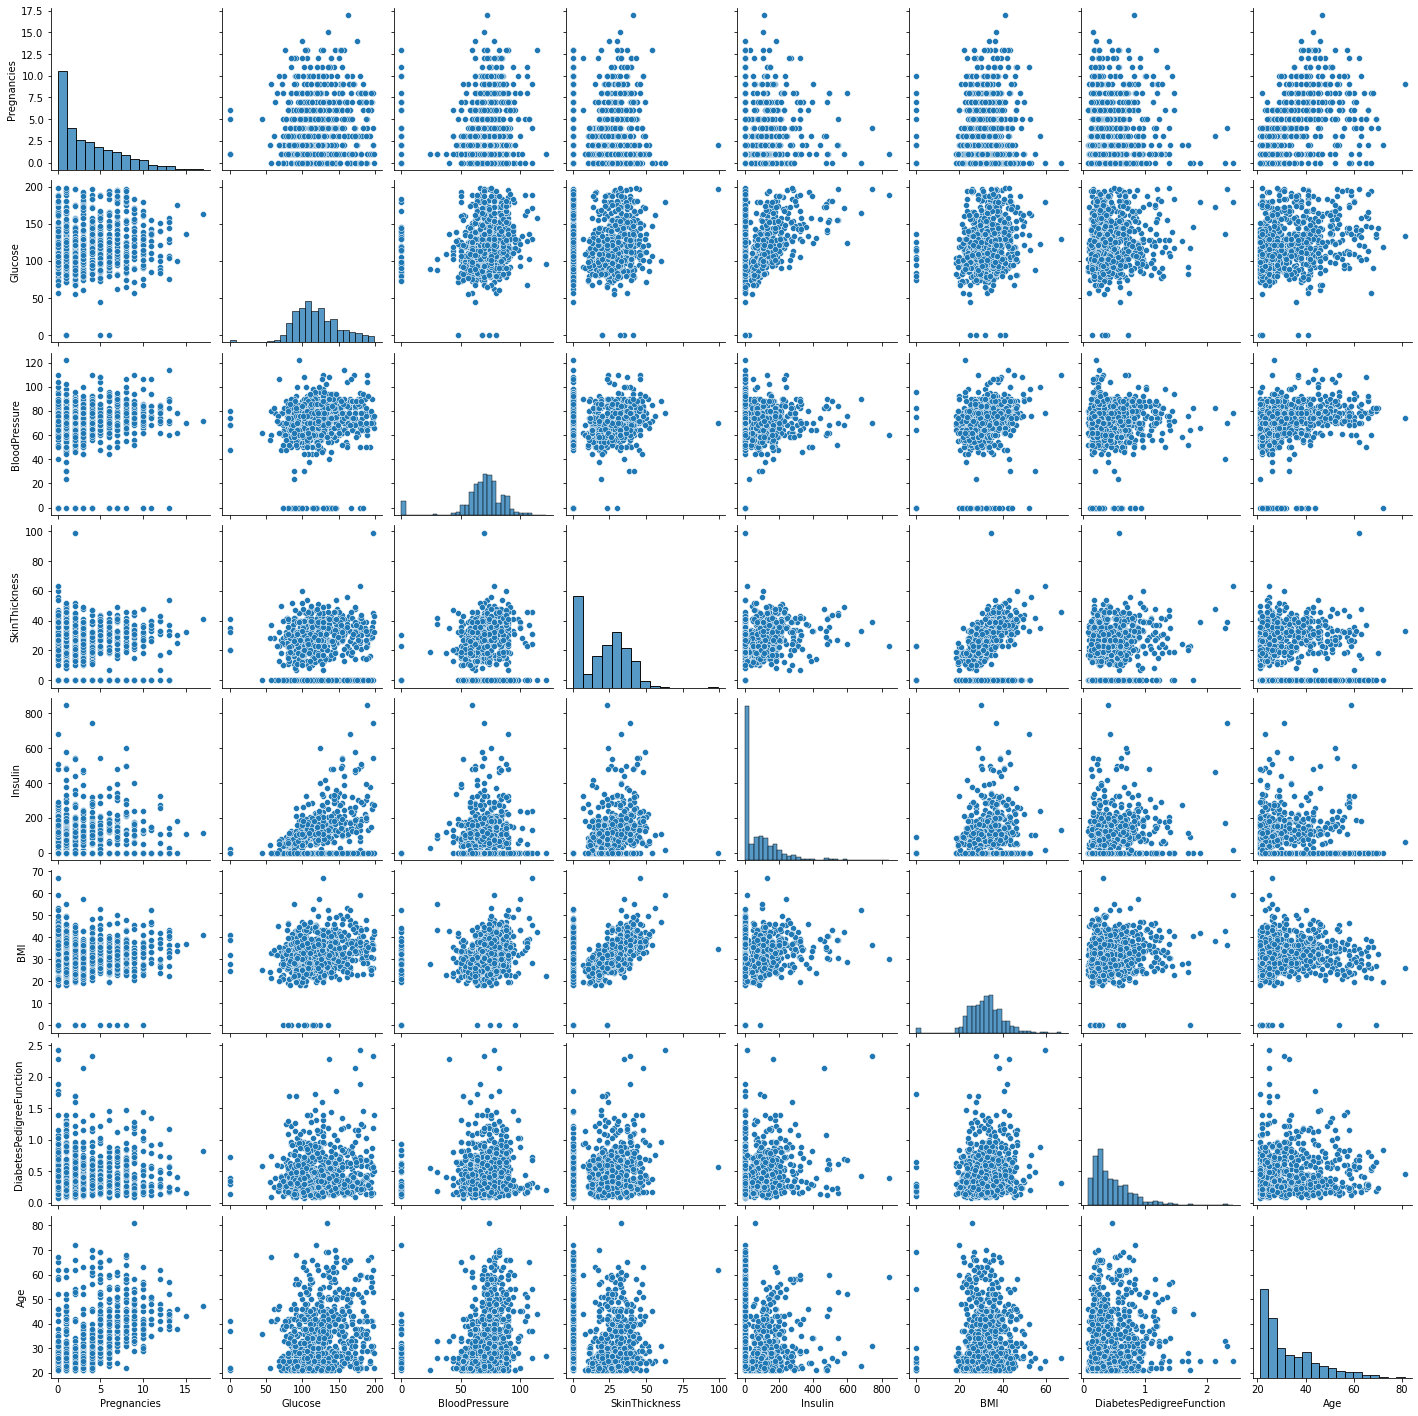

In [ ]:
sns.pairplot(df.drop('Outcome', axis = 1))

In [ ]:
df.drop('Outcome', axis = 1).corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


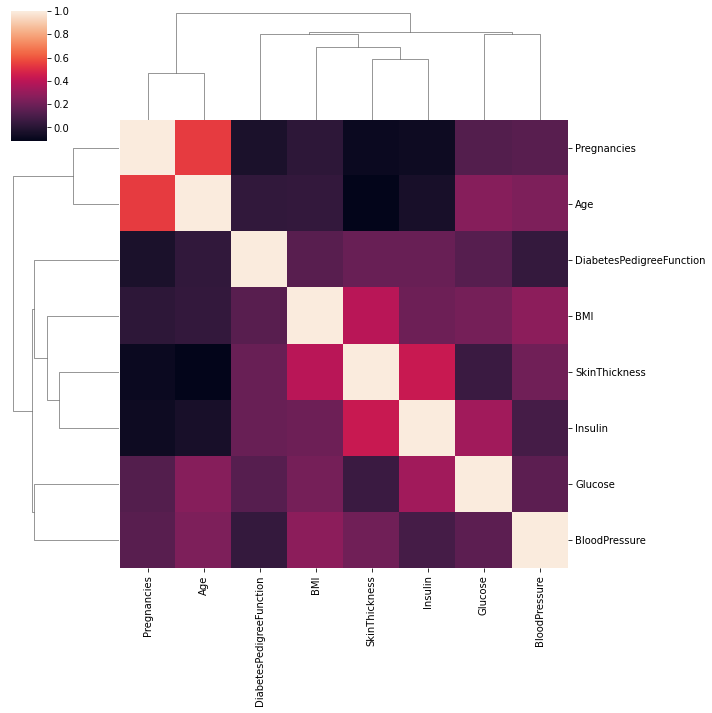

In [ ]:
sns.clustermap(df.drop('Outcome', axis = 1).corr())

In [ ]:
def t_test(df, var):
  alpha = .02
  stat, p_value = ttest_ind(df.loc[df['Outcome']==0, var], df.loc[df['Outcome']==1, var])
  if p_value < alpha:
    result = "H0 rejetée, la variable a un impact significatif"
  else:
    result = 0
  return result

In [ ]:
for col in list(df.columns)[:-1]:
  print(col + "------------------", t_test(df, col))
  

Pregnancies------------------ H0 rejetée, la variable a un impact significatif
Glucose------------------ H0 rejetée, la variable a un impact significatif
BloodPressure------------------ 0
SkinThickness------------------ 0
Insulin------------------ H0 rejetée, la variable a un impact significatif
BMI------------------ H0 rejetée, la variable a un impact significatif
DiabetesPedigreeFunction------------------ H0 rejetée, la variable a un impact significatif
Age------------------ H0 rejetée, la variable a un impact significatif


# 1. Preprocessing

## Objectif :
1. Mettre les données sous une forme propice au ML : train/test, encodage et nettoyage des NaN's
2. Evaluer les différentes stratégies de preprocessing (feature engineering/scaling/selection) sur un premier modèle basique afin de choisir la stratégie adaptée
3. Finaliser la création d'une pipeline


In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Binarizer, PolynomialFeatures
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

In [ ]:
train_set, test_set = train_test_split(df, train_size = .8, random_state = 0)

In [ ]:
def RemoveOutliers(dataset):
  test = np.zeros(len(dataset))
  for var in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    test += 1*(dataset[var] == 0)
  return dataset[test<1]

In [ ]:
def preprocessing(X):
  X = RemoveOutliers(X)
  y = X['Outcome']
  X = X.drop('Outcome', axis=1)
  X = StandardScaler().fit_transform(X)
  return X, y

In [ ]:
X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

In [ ]:
def evaluation(model, name, compteur, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  N, train_scores, valid_scores = learning_curve(model, X_train, y_train, scoring='f1', cv=4)
  plt.figure(compteur)
  plt.plot(N, np.mean(train_scores, axis=1))
  plt.plot(N, np.mean(valid_scores, axis=1))
  plt.legend(['train', 'valid'])
  plt.title(name)
  return 0

[[44  9]
 [ 6 15]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        53
           1       0.62      0.71      0.67        21

    accuracy                           0.80        74
   macro avg       0.75      0.77      0.76        74
weighted avg       0.81      0.80      0.80        74

success !


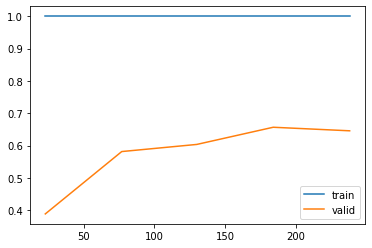

In [ ]:
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias=False), SelectKBest(f_classif, k=10), RandomForestClassifier(random_state = 0))
evaluation(model, X_train, y_train, X_test, y_test)

# Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

KNN
[[45  8]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.62      0.62      0.62        21

    accuracy                           0.78        74
   macro avg       0.73      0.73      0.73        74
weighted avg       0.78      0.78      0.78        74

Naive
[[43 10]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.63      0.81      0.71        21

    accuracy                           0.81        74
   macro avg       0.77      0.81      0.78        74
weighted avg       0.83      0.81      0.82        74

LogisticReg
[[45  8]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.62      0.62      0.62        21

    accuracy                           0.78        74
   macro avg       0.73      0.73      0.73      

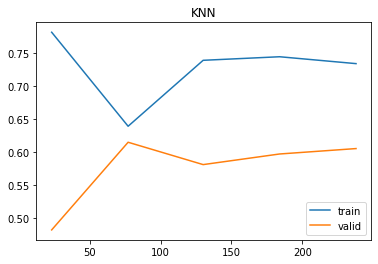

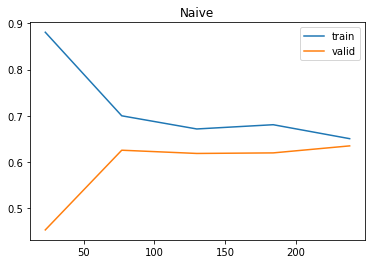

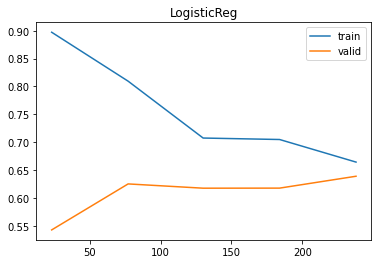

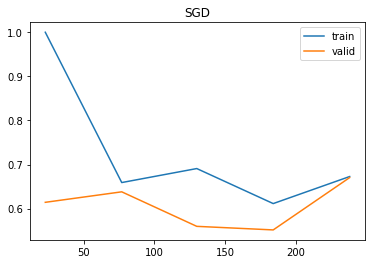

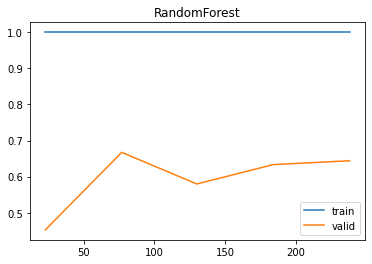

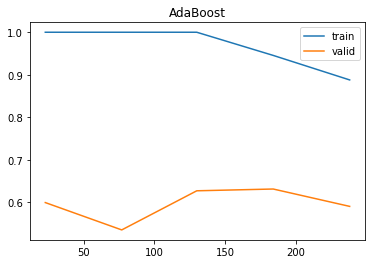

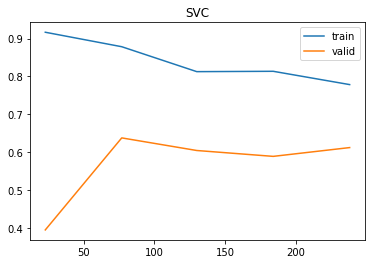

In [ ]:
models = {
    'KNN' : KNeighborsClassifier(),
    'Naive' : GaussianNB(),
    'LogisticReg' : LogisticRegression(random_state=0),
    'SGD' : SGDClassifier(random_state=0),
    'RandomForest' : RandomForestClassifier(random_state=0),
    'AdaBoost' : AdaBoostClassifier(random_state=0),
    'SVC' : SVC(random_state=0)
    }

X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

compteur = 0
for name, model in models.items():
  pipe = make_pipeline(PolynomialFeatures(degree = 2, include_bias=False), SelectKBest(f_classif, k=10), model)
  evaluation(model, name, compteur, X_train, y_train, X_test, y_test)
  compteur += 1

# Naive Bayes model optimization

In [ ]:
pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pygad

In [ ]:
num_generations = 100
gene_space = [[2, 3, 4], [i for i in range(1, 30)], list(np.logspace(0,-9, num=30))]
num_genes = len(gene_space)
sol_per_pop = 20 * num_genes
num_parents_mating = int(sol_per_pop/2)

def fitness_func(solution, solution_idx):
  NB_classifier = make_pipeline(PolynomialFeatures(degree = int(solution[0]), include_bias=False), 
                                SelectKBest(f_classif, k = int(solution[1])), GaussianNB(var_smoothing = solution[2]))
  NB_classifier.fit(X_train, y_train)
  y_pred = NB_classifier.predict(X_test)
  fitness = recall_score(y_test, y_pred)
  return fitness

ga_instance = pygad.GA(num_generations=num_generations, gene_space=gene_space, fitness_func=fitness_func, 
              sol_per_pop=sol_per_pop, num_parents_mating=num_parents_mating, num_genes=num_genes, random_seed=123)

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [ ]:
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#prediction = np.sum(np.array(function_inputs)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [2.000000e+00 1.000000e+01 1.268961e-06]
Fitness value of the best solution = 0.7619047619047619


Optimized Naive Bayes
[[47  6]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.73      0.76      0.74        21

    accuracy                           0.85        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.85      0.85      0.85        74



0

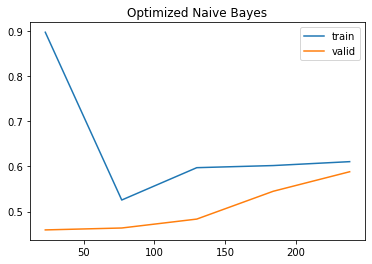

In [ ]:
NB_classifier = make_pipeline(PolynomialFeatures(degree = int(solution[0]), include_bias=False), 
                                SelectKBest(f_classif, k = int(solution[1])), GaussianNB(var_smoothing = solution[2]))
evaluation(NB_classifier, "Optimized Naive Bayes", 1, X_train, y_train, X_test, y_test)